# Machine Learning project

## **Sommaire:**

---



1. Imporation des bibliothéques
2. Importer les fichiers
3. Fusion des DataFrame et modification
4. Description de notre dataset
5. Suppresion des informations discriminantes
6. Pré-traitement des données
7. Corrélation
8. Analyse statistique
9. Developpement des modèles





## 1- Imporation des bibliothéques.

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import time
import os
from zipfile import ZipFile
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

## 2- Importer les fichiers

In [91]:
info = pd.read_csv("data/general_data.csv")
info.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [92]:
emploi=pd.read_csv("data/employee_survey_data.csv")
emploi.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [93]:
manager=pd.read_csv("data/manager_survey_data.csv")
manager.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [94]:
# extraction des deux csv du zip
file = "data/in_out_time.zip"

with ZipFile(file, 'r') as zip:
    zip.extractall()
    in_time=pd.read_csv("in_time.csv")
    out_time=pd.read_csv("out_time.csv")


## 3- Fusion des DataFrame et modification

In [95]:
#Fusion des 3 DataFrame ou l'on trouve EmployeeID
all_info = pd.merge(info, emploi, on='EmployeeID')
all_info = pd.merge(all_info, manager, on='EmployeeID')
all_info = all_info[['EmployeeID'] + [col for col in all_info.columns if col != 'EmployeeID']]
all_info.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [96]:
#Renomme pour temps de sorti le unnamed par l'id et modifie la date pour plus lisible
in_time = in_time.rename(columns={'Unnamed: 0': 'EmployeeID'})
out_time = out_time.rename(columns={'Unnamed: 0': 'EmployeeID'})

out_time.head()

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [97]:
in_time.head()

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


Moyenne arrivé et départ

In [98]:
def convert_to_datetime(df):
    return df.apply(pd.to_datetime, errors='coerce')

def to_hour(df):
    return df.apply(lambda series: series.dt.hour + (series.dt.minute / 60))

# Convertir les colonnes en datetime en une seule fois
in_time_converted = convert_to_datetime(in_time.iloc[:, 1:])
out_time_converted = convert_to_datetime(out_time.iloc[:, 1:])

# Calculer les heures en utilisant des opérations vectorisées
in_time_hours = to_hour(in_time_converted)
out_time_hours = to_hour(out_time_converted)

# Calculer les moyennes
total_time = pd.DataFrame()
total_time['mean_in_time'] = in_time_hours.mean(axis=1)
total_time['mean_out_time'] = out_time_hours.mean(axis=1)

# Calculer le temps total
total_time['total_time'] = total_time['mean_out_time'] - total_time['mean_in_time']

print(total_time.head())

   mean_in_time  mean_out_time  total_time
0      9.993032      17.367170    7.374138
1      9.980720      17.698446    7.717726
2     10.016598      17.030096    7.013499
3      9.973830      17.167305    7.193475
4      9.990068      17.996327    8.006259


## 4- Description de notre dataset

In [99]:
all_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [100]:
in_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, EmployeeID to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


In [101]:
out_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, EmployeeID to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


## 5- Suppresion des informations discriminantes

In [102]:
drop=['Age','Gender','MaritalStatus','StandardHours', 'EmployeeCount','Over18']
all_info = all_info.drop(columns=drop)
all_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   JobLevel                 4410 non-null   int64  
 8   JobRole                  4410 non-null   object 
 9   MonthlyIncome            4410 non-null   int64  
 10  NumCompaniesWorked       4391 non-null   float64
 11  PercentSalaryHike        4410 non-null   int64  
 12  StockOptionLevel         4410 non-null   int64  
 13  TotalWorkingYears        4401 non-null   float64
 14  TrainingTimesLastYear   

## 6- Pré-traitement des données

Voir ou il y'a des valeurs manquantes

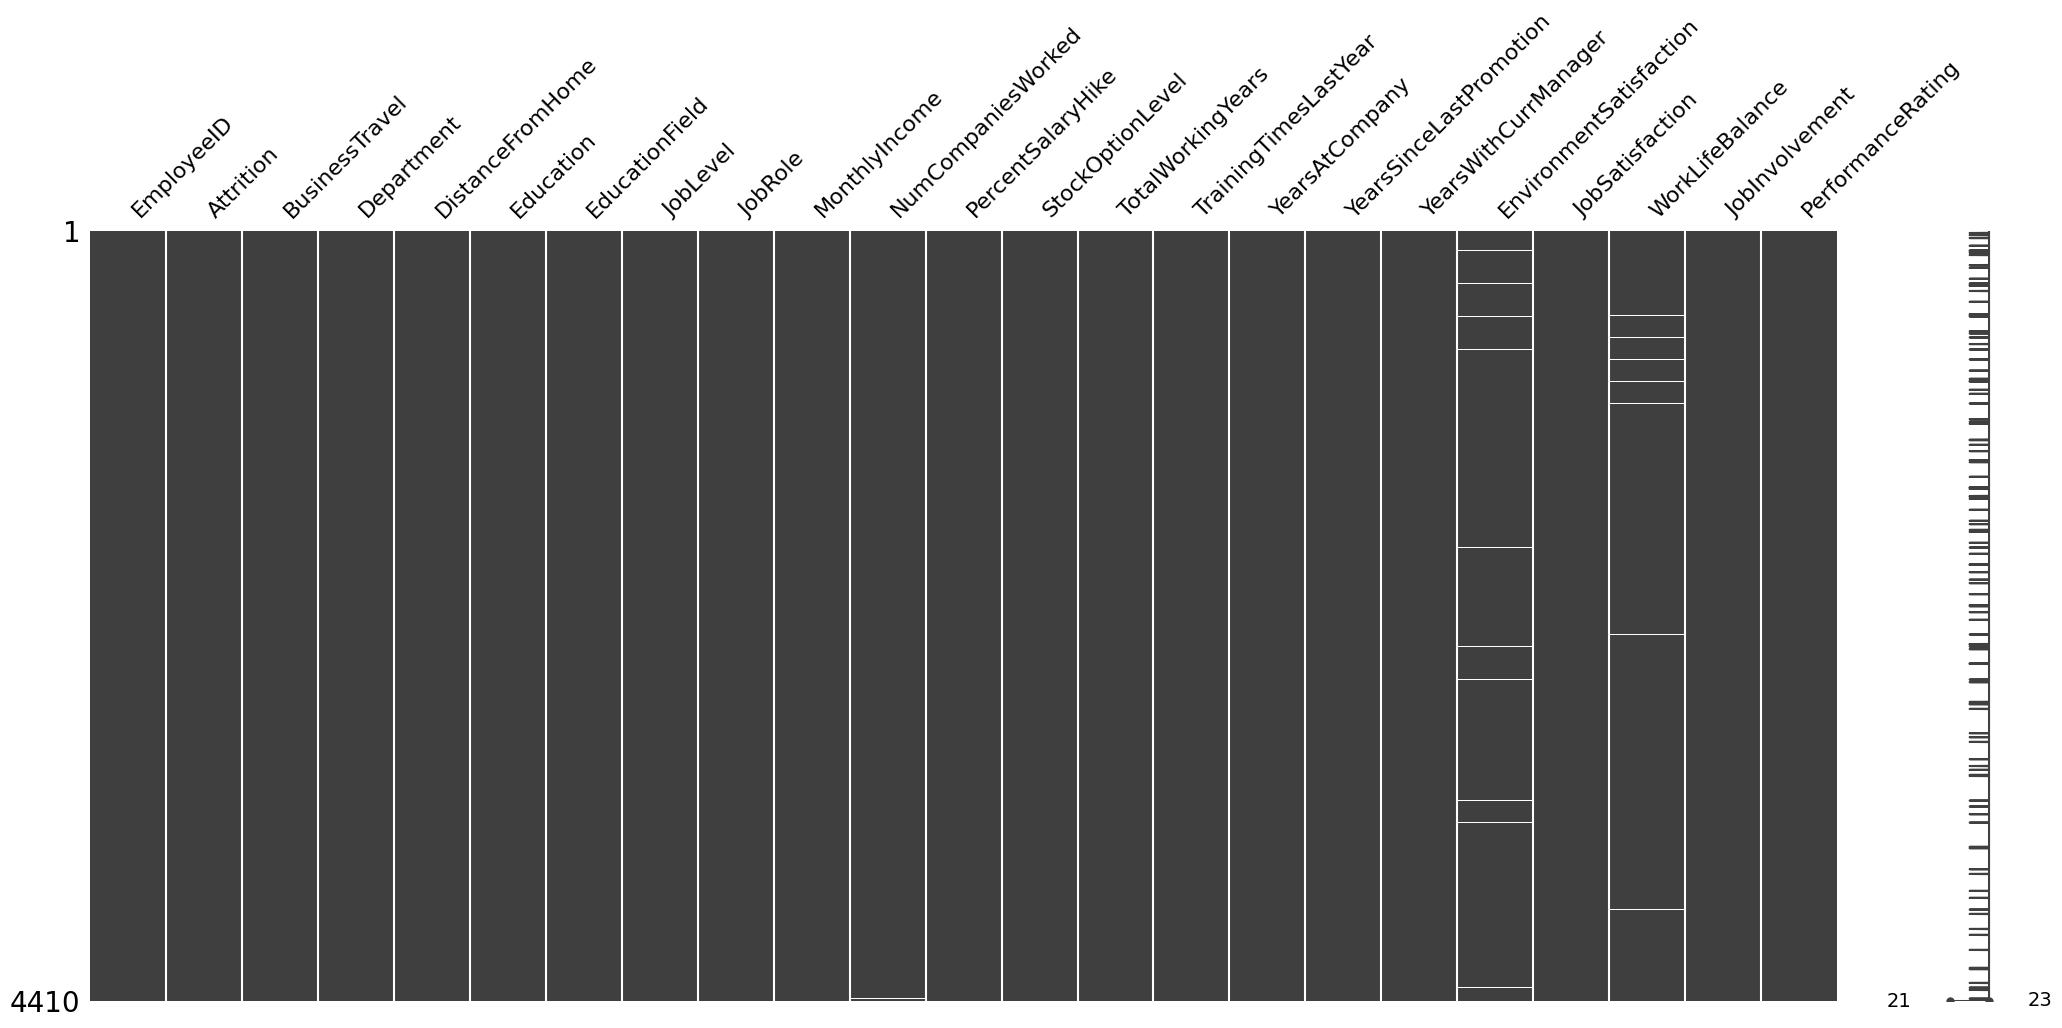

In [103]:
msno.matrix(all_info)
plt.show()

numerical_columns = all_info.select_dtypes(include=['float64', 'int64']).columns
all_info[numerical_columns] = all_info[numerical_columns].fillna(all_info[numerical_columns].median())

categorical_columns = all_info.select_dtypes(include=['object']).columns
all_info[categorical_columns] = all_info[categorical_columns].fillna(all_info[categorical_columns].mode().iloc[0])


Retirer les valeurs manquantes et abbérantes

In [104]:
imputer = SimpleImputer(strategy="median")

# Sélection des colonnes numériques
info_num = all_info[['DistanceFromHome', 'Education', 'JobLevel',
                 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','StockOptionLevel', 'TotalWorkingYears',
                 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
                 'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
                 'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating']]

imputer.fit(info_num)

# Remplacement des valeurs manquantes
info_num_imputed = pd.DataFrame(imputer.transform(info_num), columns=info_num.columns)
info_num_imputed.head()

,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,6.0,2.0,1.0,131160.0,1.0,11.0,0.0,1.0,6.0,1.0,0.0,0.0,3.0,4.0,2.0,3.0,3.0
1,10.0,1.0,1.0,41890.0,0.0,23.0,1.0,6.0,3.0,5.0,1.0,4.0,3.0,2.0,4.0,2.0,4.0
2,17.0,4.0,4.0,193280.0,1.0,15.0,3.0,5.0,2.0,5.0,0.0,3.0,2.0,2.0,1.0,3.0,3.0
3,2.0,5.0,3.0,83210.0,3.0,11.0,3.0,13.0,5.0,8.0,7.0,5.0,4.0,4.0,3.0,2.0,3.0
4,10.0,1.0,1.0,23420.0,4.0,12.0,2.0,9.0,2.0,6.0,0.0,4.0,4.0,1.0,3.0,3.0,3.0


In [105]:
# Sélection des colonnes catégorielles
info_cat = all_info.select_dtypes(include=[object])

# Encodage one-hot des variables catégorielles
encoder = OneHotEncoder(sparse_output=False)
info_cat_prepared = encoder.fit_transform(info_cat)
info_cat_encoded = pd.DataFrame(info_cat_prepared, columns=encoder.get_feature_names_out(input_features=info_cat.columns))
# Vérification du résultat de l'encodage
info_cat_encoded.head()

,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,...,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [106]:
# fusion des Data frame
info_finish = pd.concat([all_info["EmployeeID"], info_num_imputed, info_cat_encoded,total_time], axis=1)
info_finish = info_finish.drop(columns="Attrition_Yes")
info_finish = info_finish.rename(columns={'Attrition_No': 'Attrition'})
info_finish = info_finish.drop(columns="EmployeeID")
info_finish.head()

,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,mean_in_time,mean_out_time,total_time
0,6.0,2.0,1.0,131160.0,1.0,11.0,0.0,1.0,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.993032,17.367170,7.374138
1,10.0,1.0,1.0,41890.0,0.0,23.0,1.0,6.0,3.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.980720,17.698446,7.717726
2,17.0,4.0,4.0,193280.0,1.0,15.0,3.0,5.0,2.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.016598,17.030096,7.013499
3,2.0,5.0,3.0,83210.0,3.0,11.0,3.0,13.0,5.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.973830,17.167305,7.193475
4,10.0,1.0,1.0,23420.0,4.0,12.0,2.0,9.0,2.0,6.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.990068,17.996327,8.006259


Check si il manque encore des données

In [107]:
info_finish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   DistanceFromHome                   4410 non-null   float64
 1   Education                          4410 non-null   float64
 2   JobLevel                           4410 non-null   float64
 3   MonthlyIncome                      4410 non-null   float64
 4   NumCompaniesWorked                 4410 non-null   float64
 5   PercentSalaryHike                  4410 non-null   float64
 6   StockOptionLevel                   4410 non-null   float64
 7   TotalWorkingYears                  4410 non-null   float64
 8   TrainingTimesLastYear              4410 non-null   float64
 9   YearsAtCompany                     4410 non-null   float64
 10  YearsSinceLastPromotion            4410 non-null   float64
 11  YearsWithCurrManager               4410 non-null   float

## 7- Corrélation

In [108]:
pertinence_info = [info_finish["Attrition"],info_finish["TotalWorkingYears"],
                   info_finish["YearsAtCompany"],info_finish["YearsWithCurrManager"],
                   info_finish["EnvironmentSatisfaction"],info_finish["JobSatisfaction"],
                    info_finish["mean_out_time"],info_finish["total_time"]]
pertinence_info = pd.DataFrame(pertinence_info)
pertinence_info = pertinence_info.transpose()
pertinence_info.head()

,Attrition,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,mean_out_time,total_time
0,1.0,1.0,1.0,0.0,3.0,4.0,17.367170,7.374138
1,0.0,6.0,5.0,4.0,3.0,2.0,17.698446,7.717726
2,1.0,5.0,5.0,3.0,2.0,2.0,17.030096,7.013499
3,1.0,13.0,8.0,5.0,4.0,4.0,17.167305,7.193475
4,1.0,9.0,6.0,4.0,4.0,1.0,17.996327,8.006259


## Matrice de coorélation

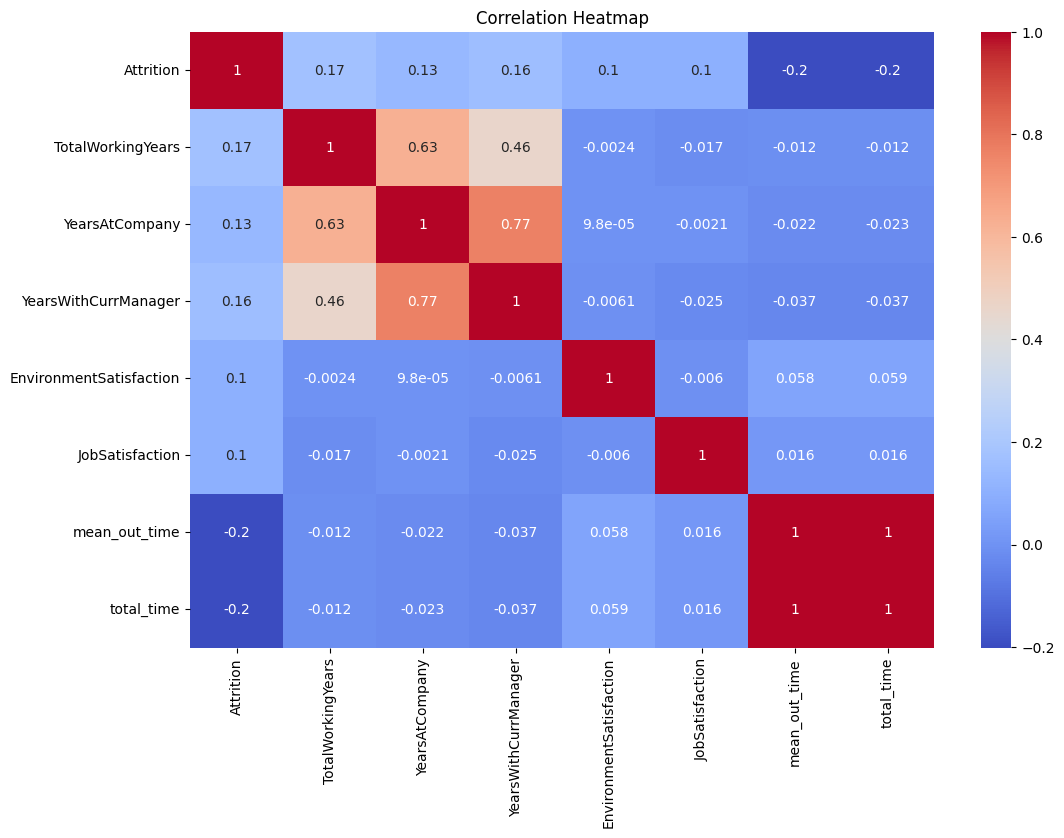

In [109]:
numerical_columns = pertinence_info.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(pertinence_info[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 8- Analyse statistique

In [110]:
info_finish.describe()

,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,mean_in_time,mean_out_time,total_time
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,9.192517,2.912925,2.063946,65029.312925,2.691837,15.209524,0.793878,11.277324,2.799320,7.008163,...,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463,9.991773,17.692558,7.700785
std,8.105026,1.023933,1.106689,47068.888559,2.493912,3.659108,0.851883,7.774490,1.288978,6.125135,...,0.381025,0.254141,0.298211,0.226874,0.399021,0.415483,0.230839,0.018147,1.340417,1.340209
min,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.929079,15.942330,5.950881
25%,2.000000,2.000000,1.000000,29110.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.979616,16.656231,6.673153
50%,7.000000,3.000000,2.000000,49190.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.991957,17.400237,7.406863
75%,14.000000,4.000000,3.000000,83800.000000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.003581,18.352469,8.368289
max,29.000000,5.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.069684,21.058616,11.031410


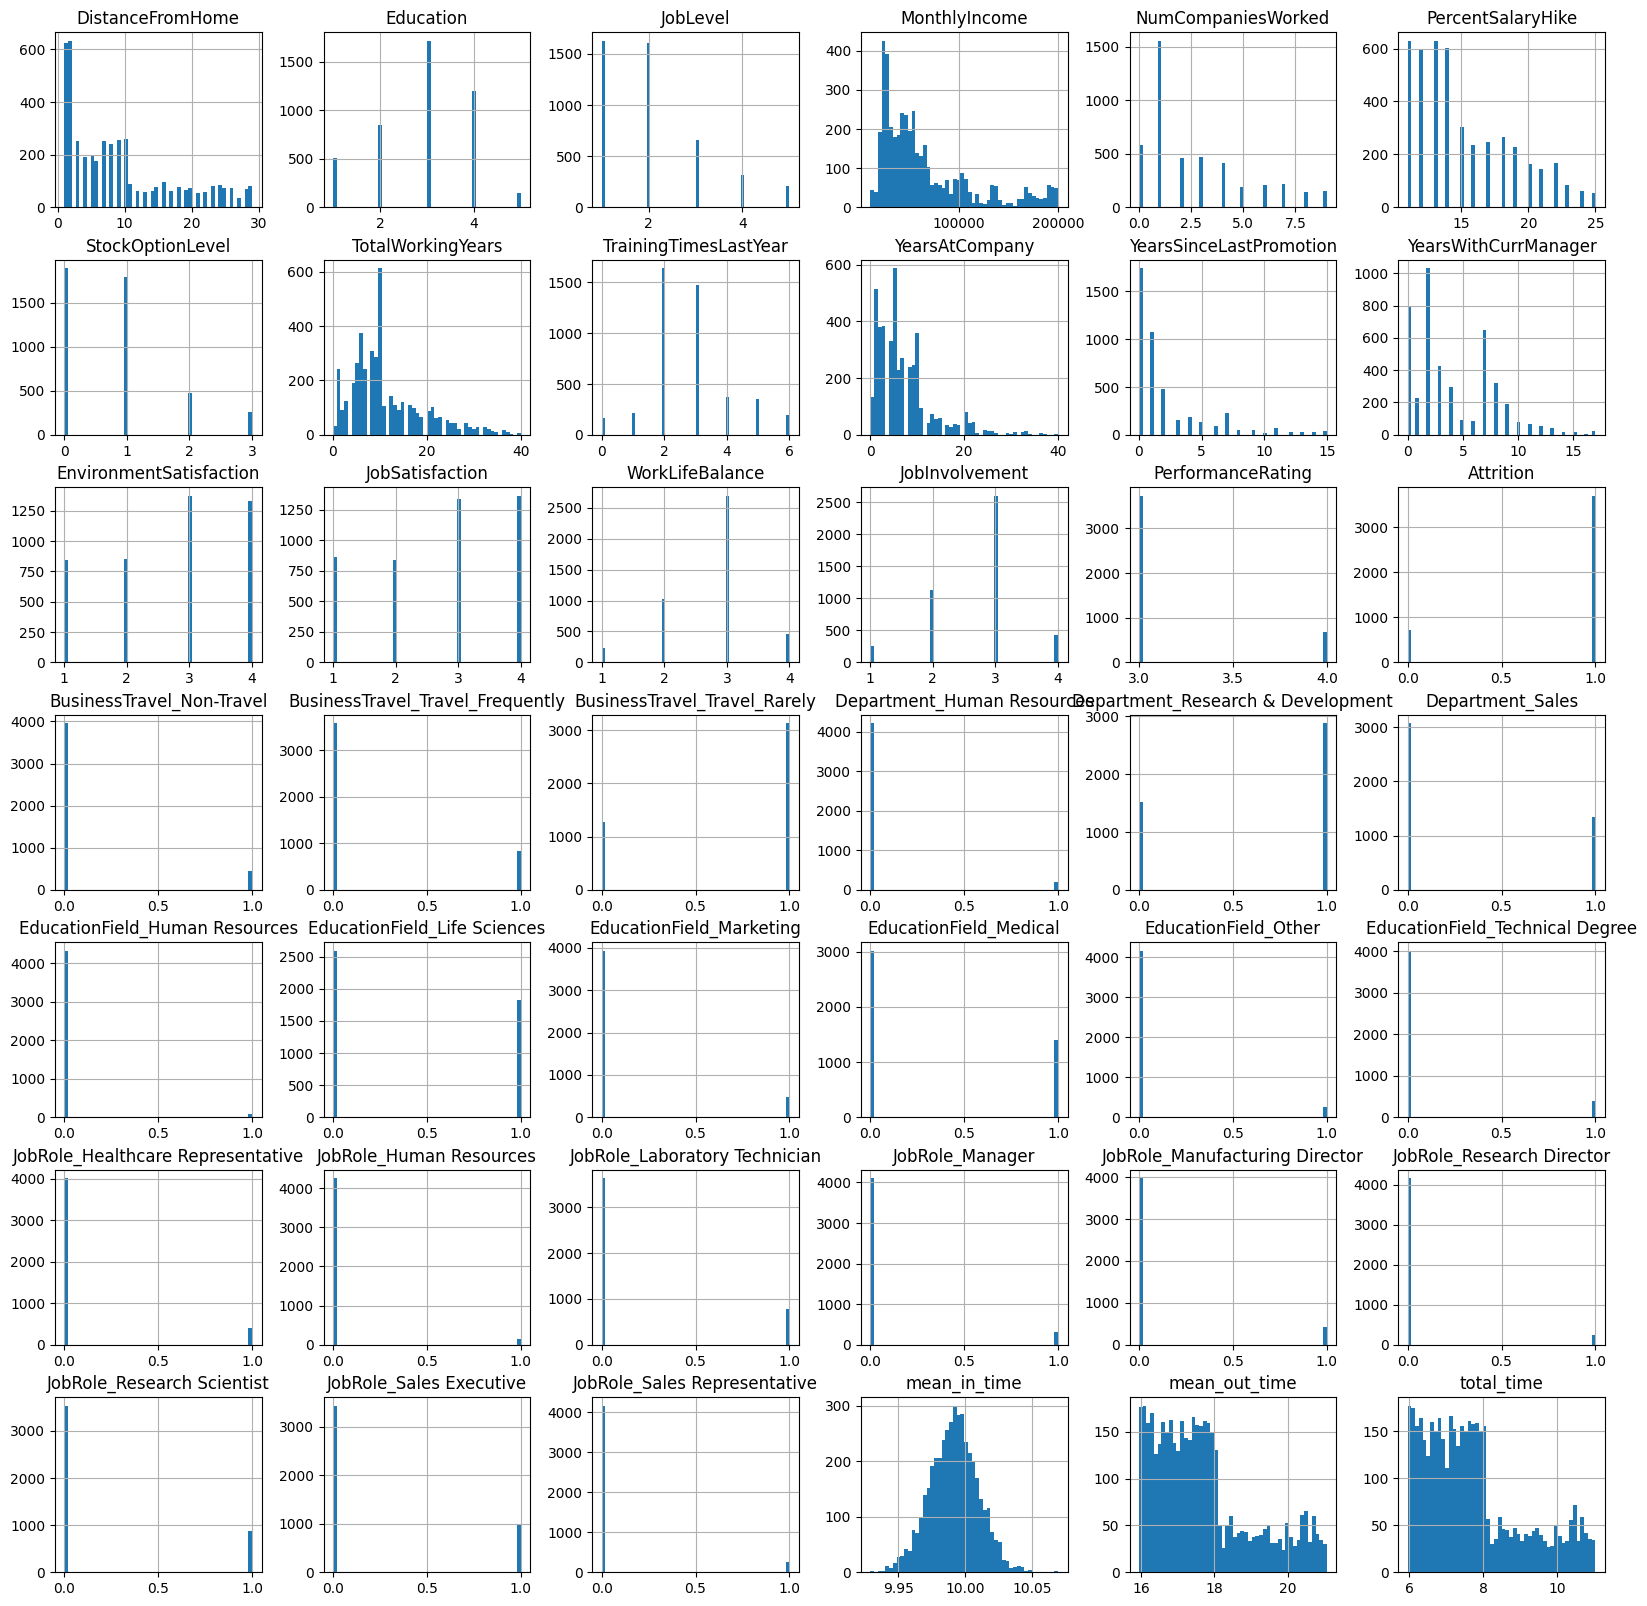

In [111]:
info_finish.hist(bins=50, figsize=(20, 20))
plt.show()

Analyse de la valeur cible

C:\Users\ajese\AppData\Local\Temp\ipykernel_9868\3375663022.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




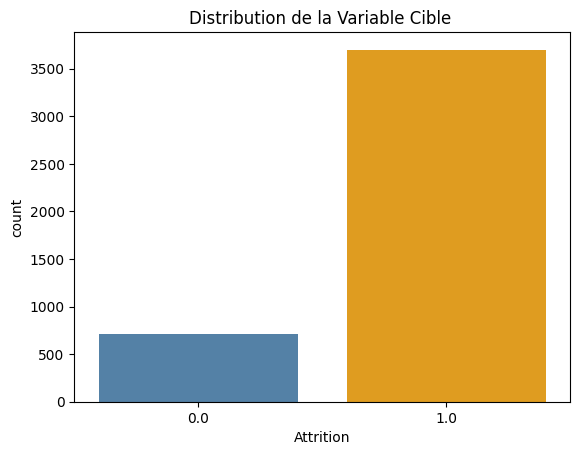

In [112]:
sns.countplot(x='Attrition', data=info_finish, palette=['steelblue','orange'])
plt.title('Distribution de la Variable Cible ')
plt.show()
#0 pour Yes 1 pour no

C:\Users\ajese\AppData\Local\Temp\ipykernel_9868\305509700.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




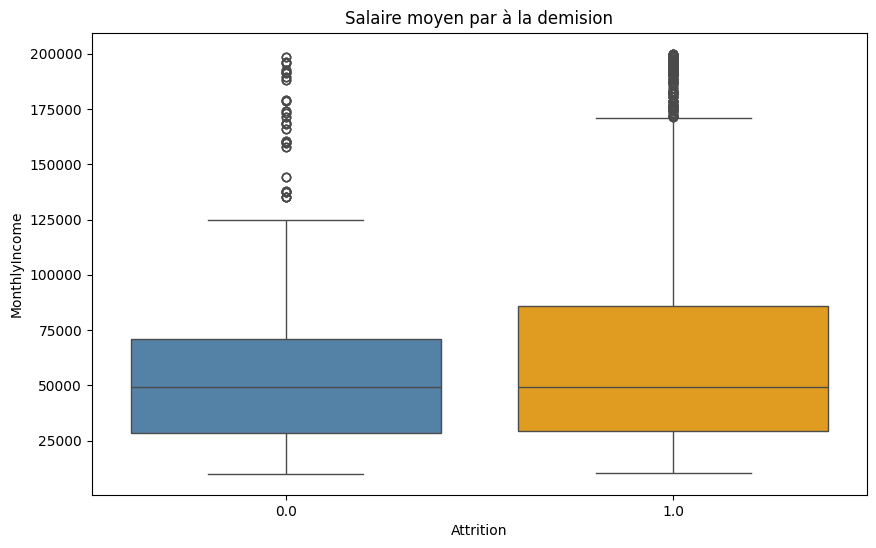

C:\Users\ajese\AppData\Local\Temp\ipykernel_9868\305509700.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




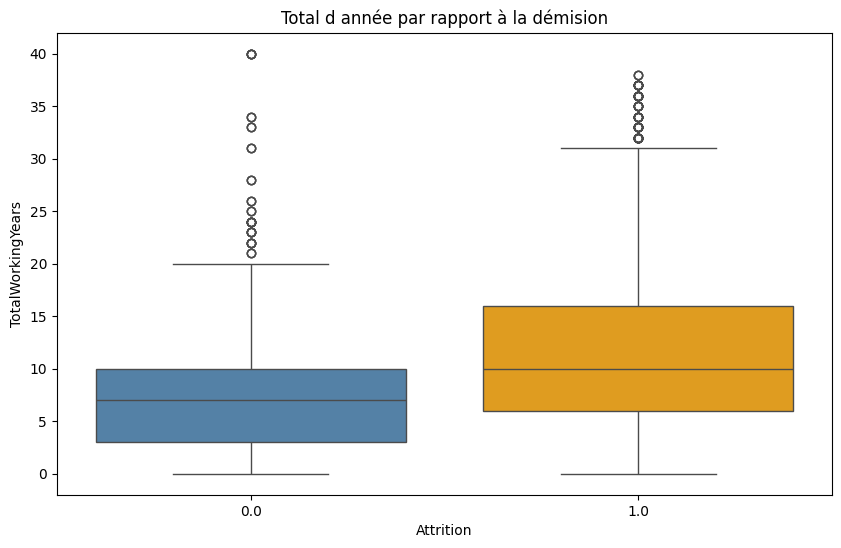

In [113]:
# Boxplot des par rapport à Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=info_finish, palette=['steelblue','orange'])
plt.title('Salaire moyen par à la demision')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=info_finish, palette=['steelblue','orange'])
plt.title('Total d année par rapport à la démision')
plt.show()


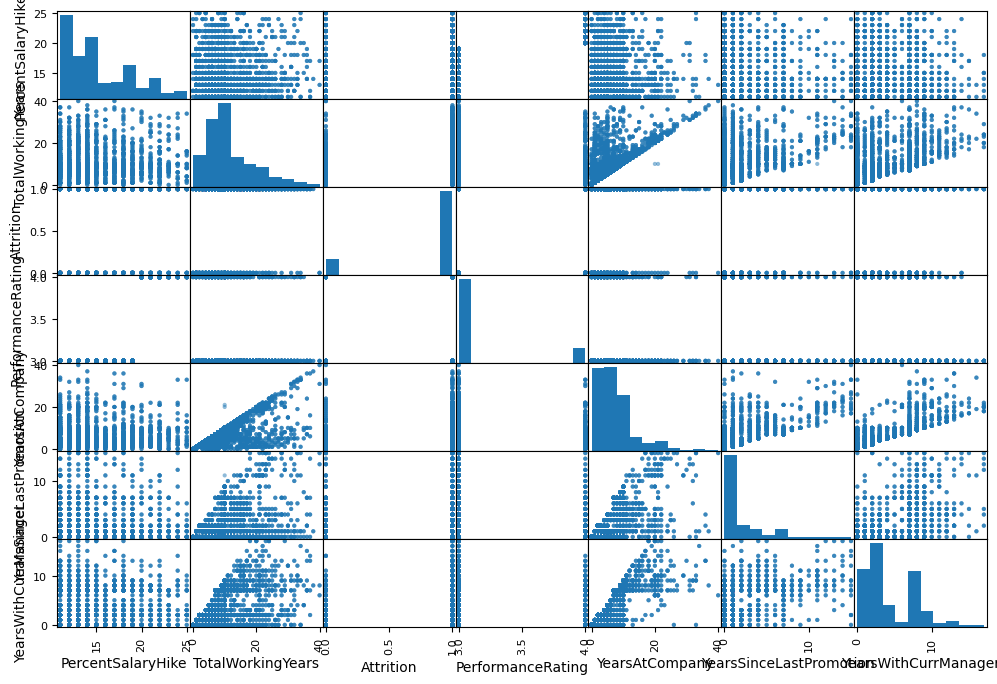

In [114]:
attribut = ["PercentSalaryHike", "TotalWorkingYears", "Attrition", "PerformanceRating",
            "YearsAtCompany", "YearsSinceLastPromotion", "YearsWithCurrManager"]

scatter_matrix = pd.plotting.scatter_matrix(info_finish[attribut], figsize=(12, 8))
plt.show()

## 9- Developpement des modèles

### Séparation des caractéristiques (X) et de la cible (y)

In [115]:
from sklearn.model_selection import train_test_split
# Séparation des caractéristiques et de la cible

X = info_finish.drop("Attrition",axis=1)
y= info_finish["Attrition"]

# Vérification des dimensions
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


(4410, 41)
(4410,)


###  Implémentation et Comparaison de Modèles de Classification Supervisée

In [116]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

models = {
    "Perceptron": Perceptron(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "NaiveBayes": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

# Entraînement et prédiction
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)


###  Visualisation des Matrices de Confusion 

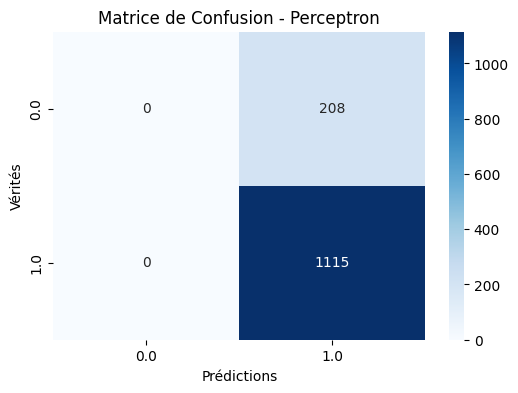

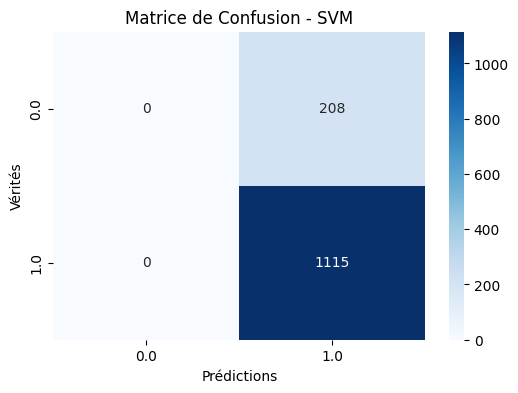

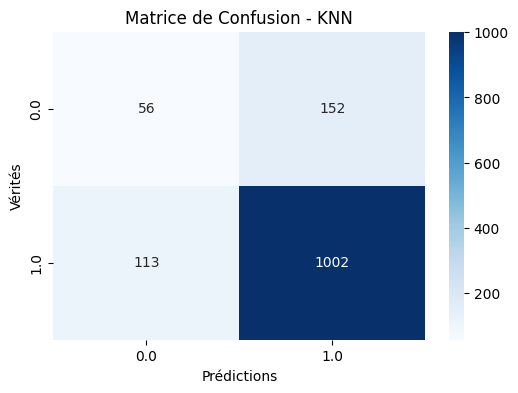

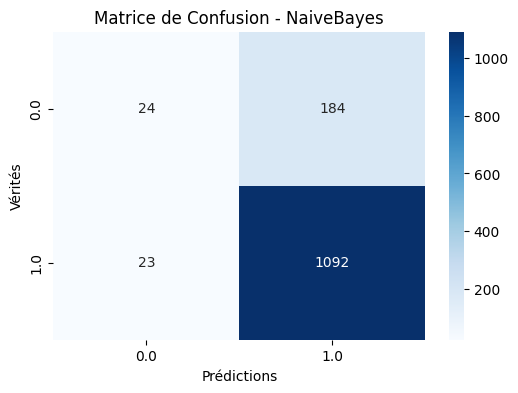

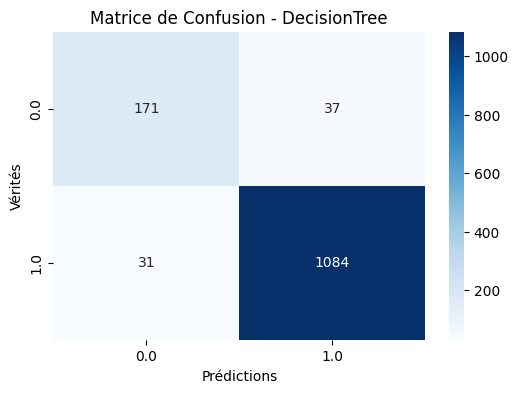

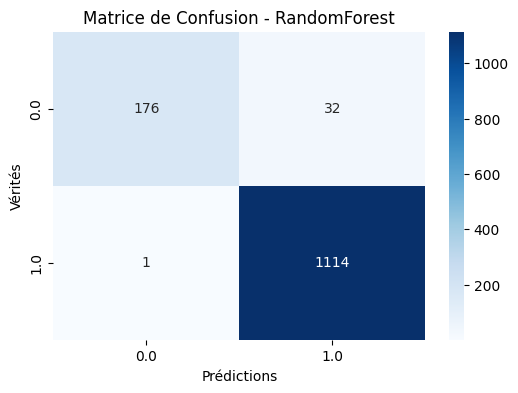

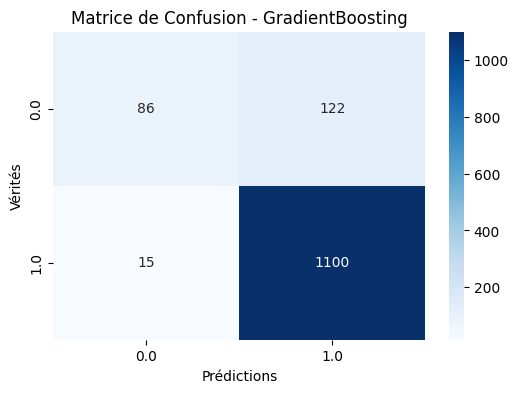

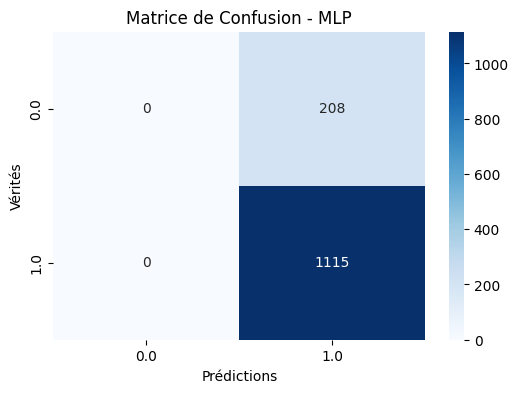

In [117]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,precision_recall_curve

for name, y_pred in predictions.items():
    # Calculer la matrice de confusion
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Visualiser la matrice de confusion avec seaborn
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f"Matrice de Confusion - {name}")
    plt.xlabel("Prédictions")
    plt.ylabel("Vérités")
    plt.show()


### Évaluation des Performances et Comparaison

In [118]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Initialisation pour stocker les performances
train_scores = {}
test_scores = {}

# Entraînement et évaluation
for name, model in models.items():
    # Entraîner le modèle
    model.fit(X_train, y_train)
    
    # Prédictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calcul des scores
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Stockage des résultats
    train_scores[name] = train_accuracy
    test_scores[name] = test_accuracy
    
    # Affichage des performances
    print(f"Model: {name}")
    print(f"Train Accuracy: {train_accuracy:.2f}")
    print(f"Test Accuracy: {test_accuracy:.2f}")
    print("-" * 30)

# Affichage des performances pour comparaison
print("Résumé des performances :")
for name in models.keys():
    print(f"{name}: Train Acc: {train_scores[name]:.2f}, Test Acc: {test_scores[name]:.2f}")
    
scores = cross_val_score(DecisionTreeClassifier(random_state=42), X_train, y_train, cv=5)
print("Validation cross-validation scores:", scores)
print("Mean CV accuracy:", scores.mean())

Model: Perceptron
Train Accuracy: 0.84
Test Accuracy: 0.84
------------------------------
Model: SVM
Train Accuracy: 0.84
Test Accuracy: 0.84
------------------------------
Model: KNN
Train Accuracy: 0.91
Test Accuracy: 0.80
------------------------------
Model: NaiveBayes
Train Accuracy: 0.84
Test Accuracy: 0.84
------------------------------
Model: DecisionTree
Train Accuracy: 1.00
Test Accuracy: 0.95
------------------------------
Model: RandomForest
Train Accuracy: 1.00
Test Accuracy: 0.98
------------------------------
Model: GradientBoosting
Train Accuracy: 0.92
Test Accuracy: 0.90
------------------------------
Model: MLP
Train Accuracy: 0.84
Test Accuracy: 0.84
------------------------------
Résumé des performances :
Perceptron: Train Acc: 0.84, Test Acc: 0.84
SVM: Train Acc: 0.84, Test Acc: 0.84
KNN: Train Acc: 0.91, Test Acc: 0.80
NaiveBayes: Train Acc: 0.84, Test Acc: 0.84
DecisionTree: Train Acc: 1.00, Test Acc: 0.95
RandomForest: Train Acc: 1.00, Test Acc: 0.98
GradientBoo

## Analyse score et performance

In [119]:
from sklearn.metrics import  precision_score, recall_score, f1_score,roc_auc_score,accuracy_score

scores = []

for name, y_pred in predictions.items():
    y_proba = models[name].predict_proba(X_test)[:, 1] if hasattr(models[name], "predict_proba") else None
    auc_score = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    scores.append({
        'Model': name,
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC': auc_score
    })

scores_df = pd.DataFrame(scores)
print(scores_df)

              Model  Precision    Recall  F1 Score       AUC
0        Perceptron   0.842782  1.000000  0.914684       NaN
1               SVM   0.842782  1.000000  0.914684  0.489061
2               KNN   0.868284  0.898655  0.883208  0.804769
3        NaiveBayes   0.855799  0.979372  0.913425  0.724685
4      DecisionTree   0.966994  0.972197  0.969589  0.897156
5      RandomForest   0.972077  0.999103  0.985405  0.995606
6  GradientBoosting   0.900164  0.986547  0.941378  0.899133
7               MLP   0.842782  1.000000  0.914684  0.582774


In [120]:
training_times = []
prediction_times = []

for name, model in models.items():
    # Mesurer le temps d'entraînement
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    training_times.append(training_time)

    # Mesurer le temps de prédiction
    start_time = time.time()
    model.predict(X_test)
    end_time = time.time()
    prediction_time = end_time - start_time
    prediction_times.append(prediction_time)

time_df = pd.DataFrame({
    'Model': models.keys(),
    'Training Time (s)': training_times,
    'Prediction Time (s)': prediction_times
})
print(time_df)


              Model  Training Time (s)  Prediction Time (s)
0        Perceptron           0.008310             0.000000
1               SVM           0.707304             0.121320
2               KNN           0.008004             0.048327
3        NaiveBayes           0.000000             0.000000
4      DecisionTree           0.032634             0.000000
5      RandomForest           0.394333             0.032233
6  GradientBoosting           0.719289             0.008337
7               MLP           0.115545             0.000000


### Visualisation des Courbes de Précision-Rappel et des Courbes ROC

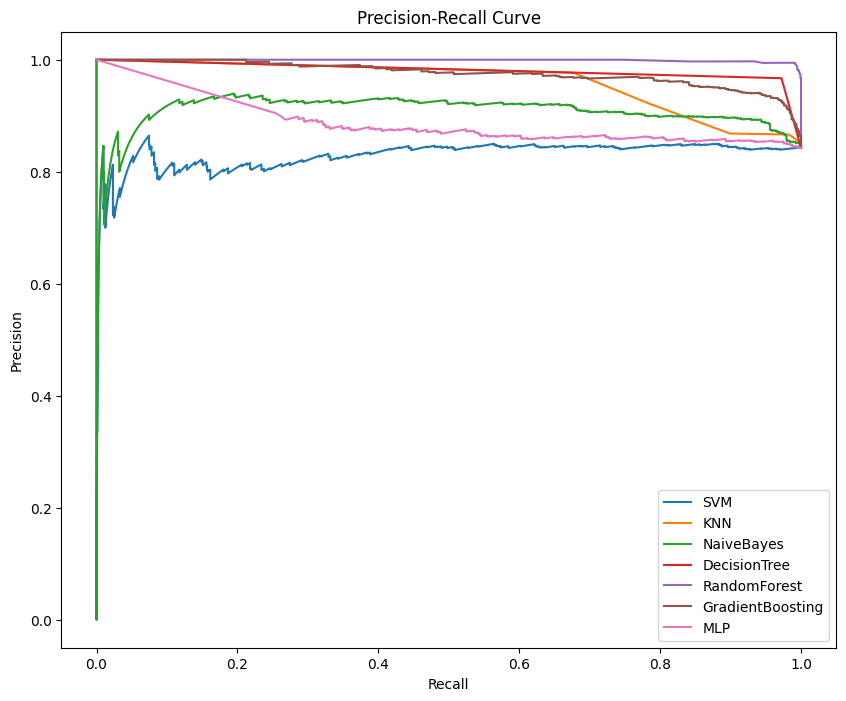

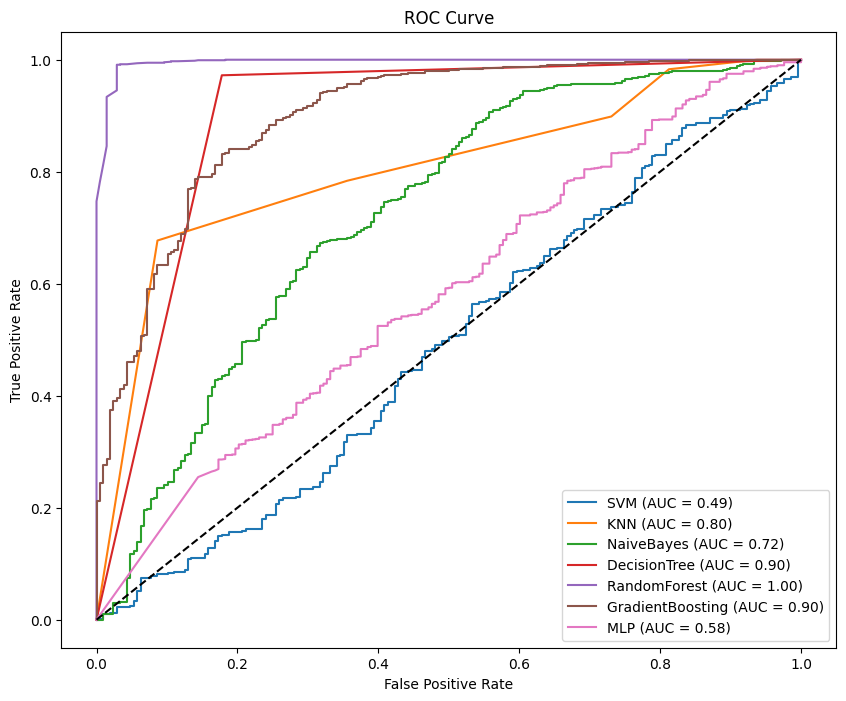

In [121]:
from sklearn.metrics import confusion_matrix,precision_recall_curve,roc_auc_score,roc_curve
# Tracer les courbes de Précision-Rappel
plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        plt.plot(recall, precision, label=f"{name}")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Tracer les courbes ROC
plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


##  RFE (Recursive Feature Elimination)

In [122]:
from sklearn.feature_selection import RFE
rf_model = RandomForestClassifier(random_state=42)
selector = RFE(estimator=rf_model, n_features_to_select=2)
selector.fit(X_train, y_train)

# Afficher les caractéristiques sélectionnées
print("Features selected:", X_train.columns[selector.support_])
print("Rang des caractéristiques :", selector.ranking_)


Features selected: Index(['MonthlyIncome', 'total_time'], dtype='object')
Rang des caractéristiques : [ 5 15 16  1  9  7 17  3 12  6 13 10  8 11 14 18 31 33 19 29 28 25 21 37
 20 32 24 39 36 30 40 26 38 34 27 23 22 35  4  2  1]


## Stacking

In [123]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# j'ai pris randomforest et desisiontree car les meilleurs modèles d'apres les graphiques au dessus
estimators = [
    ('rf', RandomForestClassifier(n_estimators=50)),
    ('DecisionTree', DecisionTreeClassifier(random_state=42))
]

# Modèle de stacking
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_clf.fit(X_train, y_train)
print("Précision sur les données d'entraînement :", stacking_clf.score(X_train, y_train))

Précision sur les données d'entraînement : 1.0


In [124]:
# Prédictions sur le jeu de test
y_test_pred = stacking_clf.predict(X_test)

# Afficher les prédictions
print("Prédictions sur le jeu de test :", y_test_pred)

# Calcul de la précision sur le jeu de test
test_accuracy = stacking_clf.score(X_test, y_test)
print("Précision sur les données de test :", test_accuracy)

Prédictions sur le jeu de test : [1. 1. 1. ... 1. 1. 1.]
Précision sur les données de test : 0.9727891156462585


In [125]:
print(scores)

[{'Model': 'Perceptron', 'Precision': np.float64(0.8427815570672713), 'Recall': np.float64(1.0), 'F1 Score': np.float64(0.9146841673502871), 'AUC': None}, {'Model': 'SVM', 'Precision': np.float64(0.8427815570672713), 'Recall': np.float64(1.0), 'F1 Score': np.float64(0.9146841673502871), 'AUC': np.float64(0.48906088306312523)}, {'Model': 'KNN', 'Precision': np.float64(0.8682842287694974), 'Recall': np.float64(0.8986547085201794), 'F1 Score': np.float64(0.883208461877479), 'AUC': np.float64(0.8047688858226976)}, {'Model': 'NaiveBayes', 'Precision': np.float64(0.8557993730407524), 'Recall': np.float64(0.979372197309417), 'F1 Score': np.float64(0.9134253450439147), 'AUC': np.float64(0.7246852362883753)}, {'Model': 'DecisionTree', 'Precision': np.float64(0.9669937555753791), 'Recall': np.float64(0.9721973094170404), 'F1 Score': np.float64(0.9695885509838998), 'AUC': np.float64(0.8971563470162125)}, {'Model': 'RandomForest', 'Precision': np.float64(0.9720767888307156), 'Recall': np.float64(0

In [126]:
import base64
import io
import plotly.express as px
import plotly.graph_objects as go
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

app = dash.Dash(__name__)

# Générer les graphiques à afficher
models["stacking_clf"] = stacking_clf
attrition_counts = info_finish['Attrition'].value_counts().reset_index()
attrition_counts.columns = ['Attrition', 'count']  # Rename columns for clarity

fig_distribution = px.bar(
    attrition_counts,
    x='Attrition',
    y='count',
    labels={'Attrition': 'Attrition', 'count': 'Count'},
    title='Distribution de la Variable Cible',
    color_discrete_sequence=['steelblue', 'orange']
)

fig_monthly_income = px.box(
    info_finish,
    x='Attrition',
    y='MonthlyIncome',
    color='Attrition',
    color_discrete_sequence=['steelblue', 'orange'],
    title='Salaire moyen par rapport à la démission'
)

fig_working_years = px.box(
    info_finish,
    x='Attrition',
    y='TotalWorkingYears',
    color='Attrition',
    color_discrete_sequence=['steelblue', 'orange'],
    title='Total d’années par rapport à la démission'
)

melted_df = scores_df.melt(id_vars=["Model"], var_name="Metric", value_name="Score")

# Créer le graphique interactif avec Plotly Express
mel_fig = px.bar(
    melted_df,
    x="Model",
    y="Score",
    color="Metric",
    barmode="group",
    title="Model Performance Metrics",
    labels={"Score": "Score", "Model": "Model"},
    color_discrete_sequence=px.colors.qualitative.Pastel
)

mel_fig.update_layout(
    xaxis_title="Model",
    yaxis_title="Score",
    legend_title="Metric",
    xaxis_tickangle=45,
    margin=dict(t=40, b=40, l=40, r=40),
)

plt.figure(figsize=(20, 20))
scatter_matrix = pd.plotting.scatter_matrix(info_finish[attribut], figsize=(12, 8))
buffer = io.BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)
encoded_scatter_image = base64.b64encode(buffer.read()).decode('utf-8')
plt.close()

plt.figure(figsize=(12, 8))
sns.heatmap(pertinence_info[numerical_columns].corr(), annot=True, cmap='coolwarm')
buffer = io.BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)
encoded_image = base64.b64encode(buffer.read()).decode('utf-8')
plt.title('Matrice de Correlation')
plt.close()

pr_fig = go.Figure()
roc_fig = go.Figure()

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        pr_fig.add_trace(go.Scatter(x=recall, y=precision, mode='lines', name=name))
        
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)
        roc_fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f"{name} (AUC = {auc:.2f})"))

pr_fig.update_layout(
    title='Precision-Recall Curve',
    xaxis_title='Recall',
    yaxis_title='Precision',
)

roc_fig.update_layout(
    title='ROC Curve',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
)

predictions = {}
feature_importance_results = {}

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

imp_fig = px.bar(
    feature_importance_df,
    x="Feature",
    y="Importance",
    color="Feature",
    title="Model Performance Metrics",
    labels={"Feature": "Feature", "Importance": "Importance"},
    color_discrete_sequence=px.colors.qualitative.Pastel
)

imp_fig.update_layout(
    xaxis_title="Feature",
    yaxis_title="Importance",
    legend_title="Importance Value",
    xaxis_tickangle=45,
    margin=dict(t=40, b=40, l=40, r=40),
)


app.layout = html.Div([
    html.H1("HumanLabAI", style={'textAlign': 'center'}),
    dcc.Tabs([
        # Onglet Analyse de l'Attrition
        dcc.Tab(label='Analyse de l Attrition', children=[
            html.Div([
                dcc.Graph(figure=fig_distribution),
                dcc.Graph(figure=fig_monthly_income),
                dcc.Graph(figure=fig_working_years)
            ]),
        ]),

        # Onglet Correlation
        dcc.Tab(label='Correlation', children=[
            html.Div([
                    html.Img(src=f'data:image/png;base64,{encoded_image}', style={'width': '100%', 'height': 'auto'}),
                    html.Img(src=f'data:image/png;base64,{encoded_scatter_image}', style={'width': '100%', 'height': 'auto'})
                                
            ],style={'textAlign': 'center'}) 
        ]),

        # Onglet Analyse Modèle
        dcc.Tab(label='Analyse Modèle', children=[
            html.Div([
                dcc.Graph(figure=pr_fig),
                dcc.Graph(figure=roc_fig),
                dcc.Graph(figure=mel_fig),
                dcc.Graph(figure=imp_fig)
                
            ]),
        ])
    ])
])

if __name__ == '__main__':
    app.run_server(debug=True, port=8051)

<Figure size 2000x2000 with 0 Axes>

In [127]:
# Configuration pour les colonnes numériques et catégorielles
config = {
    # Colonnes catégorielles
    "Attrition": {"categories": ["Yes", "No"]},
    "BusinessTravel": {"categories": ["Travel_Rarely", "Travel_Frequently", "Non-Travel"]},
    "Department": {"categories": ["Research & Development", "Sales", "Human Resources"]},
    
    # Colonnes numériques
    "DistanceFromHome": {"min": 1, "max": 30, "distribution": "uniform", "dtype": int},
    "Education": {"min": 1, "max": 5, "distribution": "uniform", "dtype": int},
    "EducationField": {"categories": ["Life Sciences", "Medical", "Marketing", "Technical Degree", "Human Resources", "Other"]},
    "JobLevel": {"min": 1, "max": 5, "distribution": "uniform", "dtype": int},
    "JobRole": {"categories": ["Sales Executive", "Research Scientist", "Laboratory Technician", "Manufacturing Director",
                               "Healthcare Representative", "Manager", "Sales Representative", "Research Director",
                               "Human Resources"]},
    "MonthlyIncome": {"min": 2000, "max": 20000, "distribution": "normal", "dtype": int},
    "NumCompaniesWorked": {"min": 0, "max": 10, "distribution": "uniform", "dtype": float},
    "PercentSalaryHike": {"min": 10, "max": 25, "distribution": "uniform", "dtype": int},
    "StockOptionLevel": {"min": 0, "max": 3, "distribution": "uniform", "dtype": int},
    "TotalWorkingYears": {"min": 0, "max": 40, "distribution": "normal", "dtype": float},
    "TrainingTimesLastYear": {"min": 0, "max": 6, "distribution": "uniform", "dtype": int},
    "YearsAtCompany": {"min": 0, "max": 20, "distribution": "normal", "dtype": int},
    "YearsSinceLastPromotion": {"min": 0, "max": 15, "distribution": "uniform", "dtype": int},
    "YearsWithCurrManager": {"min": 0, "max": 20, "distribution": "normal", "dtype": int},
    "EnvironmentSatisfaction": {"min": 1, "max": 4, "distribution": "uniform", "dtype": int},
    "JobSatisfaction": {"min": 1, "max": 4, "distribution": "uniform", "dtype": int},
    "WorkLifeBalance": {"min": 1, "max": 4, "distribution": "uniform", "dtype": int},
    "JobInvolvement": {"min": 1, "max": 4, "distribution": "uniform", "dtype": int},
    "PerformanceRating": {"min": 3, "max": 4, "distribution": "uniform", "dtype": int},
    "mean_in_time": {"min": 8, "max": 12, "distribution": "normal", "dtype": float},
    "mean_out_time": {"min": 16, "max": 20, "distribution": "normal", "dtype": float},
    "total_time": {"min": 8, "max": 12, "distribution": "normal", "dtype": float},
    
    # Autres colonnes catégorielles
    "MaritalStatus": {"categories": ["Single", "Married", "Divorced"]},
    "OverTime": {"categories": ["Yes", "No"]}
}


# Fonction pour générer les données aléatoires
def generer_nouvelles_donnees(df, config, n=10):
    np.random.seed(42)
    nouvelles_donnees = {}

    for colonne, params in config.items():
        if "distribution" in params:
            # Colonnes numériques
            if params["distribution"] == "normal":
                valeurs = np.random.normal(
                    loc=(df[colonne].mean() if colonne in df else (params["min"] + params["max"]) / 2),
                    scale=(df[colonne].std() if colonne in df else (params["max"] - params["min"]) / 6),
                    size=n
                )
            elif params["distribution"] == "uniform":
                valeurs = np.random.uniform(low=params["min"], high=params["max"], size=n)
            else:
                raise ValueError(f"Distribution {params['distribution']} non prise en charge.")
            
            # Clip et conversion du type
            valeurs = np.clip(valeurs, params["min"], params["max"])
            if params["dtype"] == int:
                valeurs = valeurs.astype(int)
            nouvelles_donnees[colonne] = valeurs

        elif "categories" in params:
            # Colonnes catégorielles
            categories = params["categories"]
            valeurs = np.random.choice(categories, size=n)
            nouvelles_donnees[colonne] = valeurs
    return pd.DataFrame(nouvelles_donnees)


nouvelles_lignes = generer_nouvelles_donnees(info_finish, config, n=100)

export_csv = nouvelles_lignes.to_csv('data/random_data_with_predictions.csv', index=False)

In [128]:
df=pd.read_csv("data/random_data_with_predictions.csv")
df.info()

imputer = SimpleImputer(strategy="median")

# Sélection des colonnes numériques
info_num = df.select_dtypes(include=['int64', 'float64'])

imputer.fit(info_num)

# Remplacement des valeurs manquantes
info_num_imputed = pd.DataFrame(imputer.transform(info_num), columns=info_num.columns)
info_num_imputed.head()

# Sélection des colonnes catégorielles
info_cat = df.select_dtypes(include=[object])

# Encodage one-hot des variables catégorielles
encoder = OneHotEncoder(sparse_output=False)
info_cat_prepared = encoder.fit_transform(info_cat)
info_cat_encoded = pd.DataFrame(info_cat_prepared, columns=encoder.get_feature_names_out(input_features=info_cat.columns))
# Vérification du résultat de l'encodage
info_cat_encoded = info_cat_encoded.drop(columns="Attrition_Yes")
info_cat_encoded = info_cat_encoded.rename(columns={'Attrition_No': 'Attrition'})


# Remplacer les valeurs de la colonne Attrition par NaN
info_cat_encoded['Attrition'] = np.nan
info_cat_encoded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Attrition                100 non-null    object 
 1   BusinessTravel           100 non-null    object 
 2   Department               100 non-null    object 
 3   DistanceFromHome         100 non-null    int64  
 4   Education                100 non-null    int64  
 5   EducationField           100 non-null    object 
 6   JobLevel                 100 non-null    int64  
 7   JobRole                  100 non-null    object 
 8   MonthlyIncome            100 non-null    int64  
 9   NumCompaniesWorked       100 non-null    float64
 10  PercentSalaryHike        100 non-null    int64  
 11  StockOptionLevel         100 non-null    int64  
 12  TotalWorkingYears        100 non-null    float64
 13  TrainingTimesLastYear    100 non-null    int64  
 14  YearsAtCompany           10

,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [129]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_test = info_cat_encoded.drop(columns=['Attrition'])
y_test = info_cat_encoded['Attrition']

missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
	X_test[col] = 0


X_test = X_test[X_train.columns]

model = RandomForestClassifier(random_state=42)

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)


info_cat_encoded['Attrition'] = model.predict(X_test)


info_cat_encoded.head()


,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
